<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF1_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


In [8]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg

--2019-04-04 02:03:45--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg.1’

imori.jpg.1         100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-04-04 02:03:45 (105 MB/s) - ‘imori.jpg.1’ saved [12638/12638]



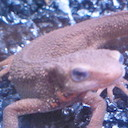

In [9]:
img  = cv2.imread("imori.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow( img)

In [0]:
_img = img.astype(np.float32)

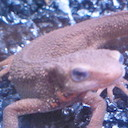

In [11]:
cv2_imshow(_img)

In [12]:
img[20, 30]

array([232, 178, 171], dtype=uint8)

In [13]:
img[20, 30, 1]

178

In [14]:
img[20, 30:33]

array([[232, 178, 171],
       [209, 156, 153],
       [134,  85,  77]], dtype=uint8)

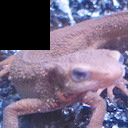

In [15]:
img2 = img.copy()
img2[:50, :50]  = 0
cv2_imshow(img2)

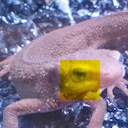

In [16]:
img2 = img.copy().astype(np.float32)
img2[60:100, 60:100, 0 ]  =260
cv2_imshow(img2.astype(np.uint8))

In [17]:
cv2.imwrite("tutorial-imori.jpg", img2)

True

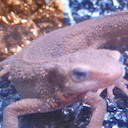

In [18]:
img3  = img.copy().astype(np.float32)
h, w , c  = img3.shape
img3[:h//2, :w//2] = img3[:h//2, :w//2, (2, 1, 0)]
cv2_imshow(img3.astype(np.uint8))

#1

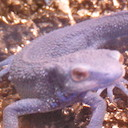

In [19]:
import cv2
img = cv2.imread("imori.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

img[:, :, 0]  = r
img[:, :, 1] = g
img[:, :, 2] = b

cv2.imwrite("out1.jpg", img)
cv2_imshow(img)


#2

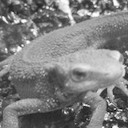

In [20]:
import cv2
img = cv2.imread("imori.jpg").astype(np.float32)
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

y = 0.2126*r + 0.7152*g + 0.0722*b
out = y.astype(np.uint8)
cv2.imwrite("out2.jpg", out)
cv2_imshow(out)

#3

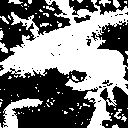

In [21]:
import cv2
img = cv2.imread("imori.jpg").astype(np.float32)
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

y = 0.2126*r + 0.7152*g + 0.0722*b
out = y.astype(np.uint8)

#二値化
th = 128
out[out < th] = 0
out[out >= th] = 255

cv2.imwrite("out3.jpg", out)
cv2_imshow(out)


#4

threshold >> 127


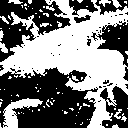

In [22]:
import cv2
import numpy as np

# Read image
img = cv2.imread("imori.jpg").astype(np.float)

H, W, C = img.shape

out = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = out.astype(np.uint8)

max_sigma = 0
max_t = 0

for t in range(1, 255):
  v0 = out[np.where(out < t)]
  m0 = np.mean(v0) if len(v0) > 0 else 0.
  w0 = len(v0) / (H * W)
  v1 = out[np.where(out >= t)]
  m1 = np.mean(v1) if len(v1) > 0 else 0.
  w1 = len(v1) /(H * W)
  sigma = w0 * w1 * ((m0 - m1) ** 2)
  
  if sigma > max_sigma:
    max_sigma = sigma
    max_t = t

print("threshold >>", max_t)
th = max_t
out[out < th] = 0
out[out >= th] = 255

cv2.imwrite("out.jpg", out)
cv2_imshow(out)

#5

In [23]:
import cv2
import numpy as np
 #RGB -> HSV
img = cv2.imread("imori.jpg").astype(np.float32) / 255.
out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0

#if min == B
ind = np.where(min_arg == 0)
H = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60

#ig min == G
ind = np.where(min_arg == 2)
H = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180

#if min == B
ind = np.where(min_arg == 1)
H = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300

V = max_v.copy()
S = max_v.copy() - min_v.copy()

# Transpose Hue
H = (H + 180) % 360

C = S
H_ = H / 60 
X = C * (1 - np.abs( H_ % 2 - 1))
Z = np.zeros_like(H)

vals = [ [Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C] ]

for i in range(6):
  ind = np.where((i <= H_) & (H_ % 2 - 1))
  out[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
  out[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
  out[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]
  
  out[np.where(max_v == min_v)] = 0
  out = (out * 255).astype(np.uint8)

cv2.imwrite("out5.jpg", out)
cv2_imshow(out)



ValueError: ignored

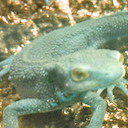

In [26]:
import cv2
import numpy as np

# Read image
img = cv2.imread("imori.jpg").astype(np.float32) / 255.

# RGB > HSV
out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

# Transpose Hue
H = (H + 180) % 360

# HSV > RGB

C = S
H_ = H / 60
X = C * (1 - np.abs( H_ % 2 - 1))
Z = np.zeros_like(H)

vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

for i in range(6):
    ind = np.where((i <= H_) & (H_ < (i+1)))
    out[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
    out[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
    out[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]

out[np.where(max_v == min_v)] = 0
out = (out * 255).astype(np.uint8) 

# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)

#6

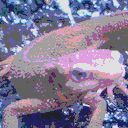

In [25]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

img_ = img.copy()

img_ = img_ // 64 * 64 + 32
cv2.imwrite("out6.jpg", img_)
cv2_imshow(img_)

#7

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


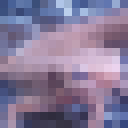

In [27]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

out = img.copy()
G = 8


for i in range(H):
  for j in range(W):
    for c in range(C):
      out[ i*G : i*G+G,  j*G : j*G+G, c] =  np.mean(out[ i*G : i*G+G, j*G : j*G+G, c]).astype(np.int)
  
cv2.imwrite("out7.jpg", out)
cv2_imshow(out)

In [28]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori_noise.jpg

--2019-04-04 02:04:23--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori_noise.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14696 (14K) [image/jpeg]
Saving to: ‘imori_noise.jpg.1’

imori_noise.jpg.1   100%[===================>]  14.35K  --.-KB/s    in 0.007s  

2019-04-04 02:04:23 (2.05 MB/s) - ‘imori_noise.jpg.1’ saved [14696/14696]



#8

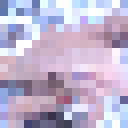

In [38]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

R = 8

out = img.copy()

for h in range(int(H/R)):
  for w in range(int(W/R)):
    for c in range(C):
      out[R*h : R*(h+1), R*w : R*(w+1), c] = np.amax(out[R*h : R*(h+1), R*w : R*(w+1), c])
      
out = out.astype(np.uint8)

cv2.imwrite("out8.jpg", out)
cv2_imshow(out)

#9

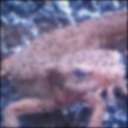

In [33]:
import cv2
import numpy as np

img = cv2.imread("imori_noise.jpg").astype(np.float32)
H, W, C = img.shape

K_size = 13
sigma = 1.3

#zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype = np.float)
out[pad:pad+H, pad:pad+W] = img.copy()

#Kernel
K = np.zeros((K_size, K_size), dtype=np.float)

for x in range(-pad, -pad+K_size):
  for y in range(-pad, -pad+K_size):
    K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2 * (sigma * 2) ))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

tmp = out.copy()
for y in range(H):
  for x in range(W):
    for c in range(C):
      out[pad+y, pad+x,c] =  np.sum(K * tmp[y:y+K_size, x:x+K_size, c])
      
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

cv2.imwrite("out9.jpg", out)
cv2_imshow(out)

#10

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori_noise.jpg").astype(np.float32)
H, W, C = img.shape

In [0]:
#median
R = 3 #range ... R x R

#zero padding
pad = R // 2
out = np.zeros((H+pad*2, W+pad*2, C), dtype=np.float32)

out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float32)

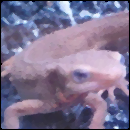

In [52]:
for h in range(H):
  for w in range(W):
    for c in range(C):
      out[h+pad, w+pad, c] = np.median(out[h:h+R, w:w+R, c])
      
out = out.astype(np.uint8)

cv2.imwrite("out10.jpg", out)
cv2_imshow(out)